In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix
)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import SGD

In [2]:
df = pd.read_csv("bank-full.csv", sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
df['y'] = df['y'].astype(str).str.strip().str.lower()
df['y'] = df['y'].map({'yes': 1, 'no': 0})
df = df.dropna(subset=['y'])
df['y'] = df['y'].astype(int)
print(df['y'].value_counts())

y
0    39922
1     5289
Name: count, dtype: int64


In [4]:
categorical_cols = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [5]:
X = df.drop('y', axis=1)
y = df['y']

In [6]:
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y,
    test_size=0.30,
    random_state=42,
    stratify=y
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.50,
    random_state=42,
    stratify=y_temp
)

In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train).astype(np.float32)
X_val   = scaler.transform(X_val).astype(np.float32)
X_test  = scaler.transform(X_test).astype(np.float32)

In [8]:
def build_model(optimizer):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])
    model.compile(
        optimizer=optimizer,
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

In [9]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

In [10]:
def train_model(optimizer, batch_size):
    model = build_model(optimizer)
    start_time = time.time()
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=30,
        batch_size=batch_size,
        callbacks=[early_stop],
        verbose=1
    )
    training_time = time.time() - start_time
    return model, history, training_time

In [11]:
optimizers = {
    "Batch_GD": SGD(learning_rate=0.01),
    "SGD": SGD(learning_rate=0.01),
    "MiniBatch": SGD(learning_rate=0.01),
    "Momentum": SGD(learning_rate=0.01, momentum=0.9),
    "Nesterov": SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
}
batch_sizes = {
    "Batch_GD": 1024,
    "SGD": 1,
    "MiniBatch": 64,
    "Momentum": 64,
    "Nesterov": 64
}

In [12]:
histories = {}
models = {}
times = {}
for name in optimizers:
    model, history, t = train_model(
        optimizers[name],
        batch_sizes[name]
    )
    histories[name] = history
    models[name] = model
    times[name] = t
    print(f"{name} training time: {t:.2f} seconds")

Epoch 1/30


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8126 - loss: 0.5250 - val_accuracy: 0.8798 - val_loss: 0.4481
Epoch 2/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8705 - loss: 0.4516 - val_accuracy: 0.8829 - val_loss: 0.4097
Epoch 3/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8812 - loss: 0.4160 - val_accuracy: 0.8829 - val_loss: 0.3882
Epoch 4/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8829 - loss: 0.3987 - val_accuracy: 0.8829 - val_loss: 0.3729
Epoch 5/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8821 - loss: 0.3838 - val_accuracy: 0.8831 - val_loss: 0.3604
Epoch 6/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8869 - loss: 0.3703 - val_accuracy: 0.8832 - val_loss: 0.3496
Epoch 7/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8851 - loss: 0.3626 - val_accuracy: 0.8837 - val_loss: 0.3401
Epoch 8/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8828 - loss: 0.3610 - val_accuracy: 0.8841 - val_loss: 0.3315
E

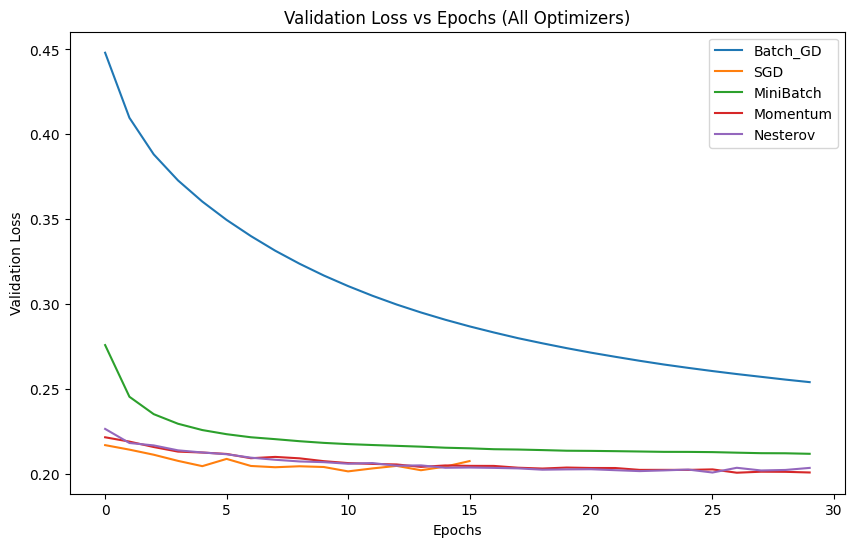

In [13]:
plt.figure(figsize=(10,6))
for name, history in histories.items():
    plt.plot(history.history['val_loss'], label=name)
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.title("Validation Loss vs Epochs (All Optimizers)")
plt.legend()
plt.show()

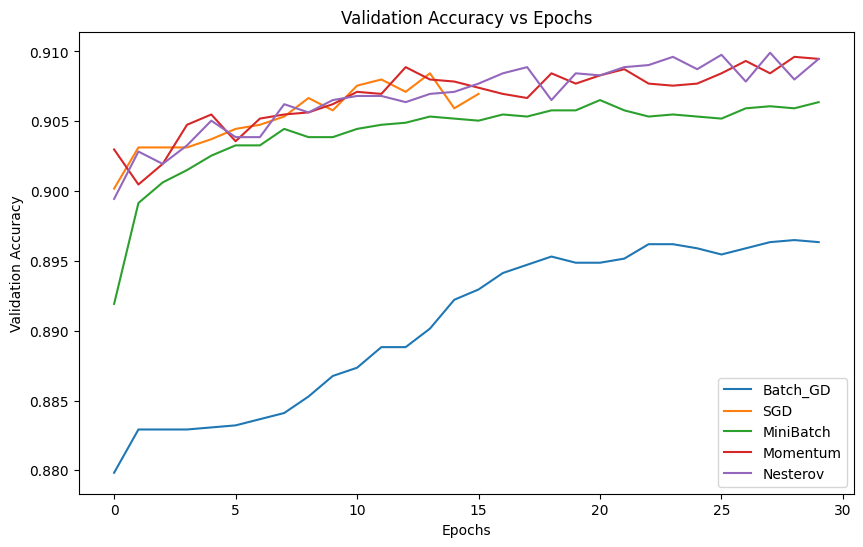

In [14]:
plt.figure(figsize=(10,6))
for name, history in histories.items():
    plt.plot(history.history['val_accuracy'], label=name)
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracy vs Epochs")
plt.legend()
plt.show()

Epoch 1/30
989/989 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8431 - loss: 0.4086 - val_accuracy: 0.8974 - val_loss: 0.2502
Epoch 2/30
989/989 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8937 - loss: 0.2682 - val_accuracy: 0.9005 - val_loss: 0.2332
Epoch 3/30
989/989 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8979 - loss: 0.2477 - val_accuracy: 0.9003 - val_loss: 0.2260
Epoch 4/30
989/989 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8967 - loss: 0.2434 - val_accuracy: 0.9006 - val_loss: 0.2225
Epoch 5/30
989/989 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8982 - loss: 0.2386 - val_accuracy: 0.9002 - val_loss: 0.2200
Epoch 6/30
989/989 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8939 - loss: 0.2348 - val_accuracy: 0.9000 - val_loss: 0.2184
Epoch 7/30
989/989 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9037 - loss: 0.2207 - val_accuracy: 0.9012 - val_loss: 0.2175
Epoch 8/30
989/989 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9001 - loss: 0.2235 - val_accuracy: 0.

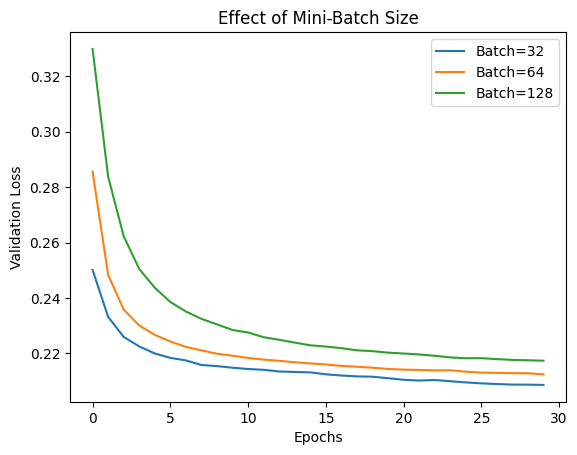

In [15]:
for bs in [32, 64, 128]:
    optimizer = SGD(learning_rate=0.01)
    _, history, _ = train_model(optimizer, bs)
    plt.plot(history.history['val_loss'], label=f"Batch={bs}")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.title("Effect of Mini-Batch Size")
plt.legend()
plt.show()

Epoch 1/30
495/495 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6425 - loss: 0.6362 - val_accuracy: 0.8826 - val_loss: 0.4309
Epoch 2/30
495/495 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8753 - loss: 0.4407 - val_accuracy: 0.8829 - val_loss: 0.3821
Epoch 3/30
495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8843 - loss: 0.3952 - val_accuracy: 0.8829 - val_loss: 0.3590
Epoch 4/30
495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8819 - loss: 0.3758 - val_accuracy: 0.8829 - val_loss: 0.3421
Epoch 5/30
495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8829 - loss: 0.3609 - val_accuracy: 0.8829 - val_loss: 0.3278
Epoch 6/30
495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8827 - loss: 0.3498 - val_accuracy: 0.8831 - val_loss: 0.3155
Epoch 7/30
495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8838 - loss: 0.3377 - val_accuracy: 0.8835 - val_loss: 0.3053
Epoch 8/30
495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8853 - loss: 0.3264 - val_accuracy: 0.

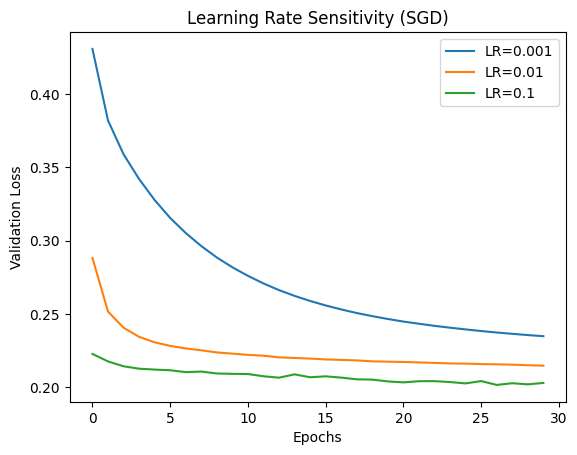

In [16]:
for lr in [0.001, 0.01, 0.1]:
    optimizer = SGD(learning_rate=lr)
    _, history, _ = train_model(optimizer, 64)
    plt.plot(history.history['val_loss'], label=f"LR={lr}")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.title("Learning Rate Sensitivity (SGD)")
plt.legend()
plt.show()

Epoch 1/30
495/495 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8498 - loss: 0.4155 - val_accuracy: 0.8972 - val_loss: 0.2570
Epoch 2/30
495/495 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8956 - loss: 0.2623 - val_accuracy: 0.8993 - val_loss: 0.2360
Epoch 3/30
495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8958 - loss: 0.2530 - val_accuracy: 0.9009 - val_loss: 0.2284
Epoch 4/30
495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8988 - loss: 0.2376 - val_accuracy: 0.9002 - val_loss: 0.2240
Epoch 5/30
495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8981 - loss: 0.2347 - val_accuracy: 0.9002 - val_loss: 0.2219
Epoch 6/30
495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8972 - loss: 0.2344 - val_accuracy: 0.8994 - val_loss: 0.2199
Epoch 7/30
495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9000 - loss: 0.2289 - val_accuracy: 0.8999 - val_loss: 0.2190
Epoch 8/30
495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9007 - loss: 0.2277 - val_accuracy: 0.

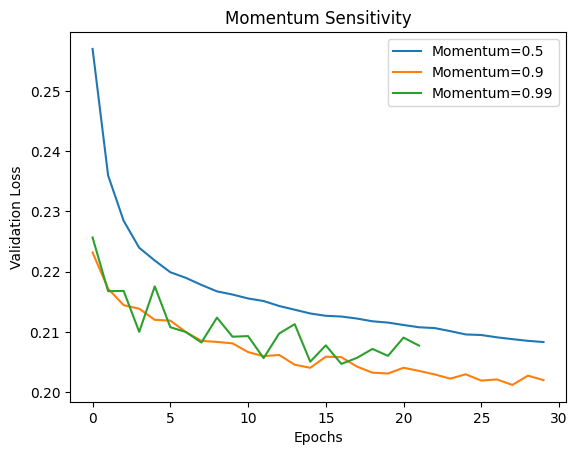

In [17]:
for m in [0.5, 0.9, 0.99]:
    optimizer = SGD(learning_rate=0.01, momentum=m)
    _, history, _ = train_model(optimizer, 64)
    plt.plot(history.history['val_loss'], label=f"Momentum={m}")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.title("Momentum Sensitivity")
plt.legend()
plt.show()

In [18]:
best_model = models["Nesterov"]
y_pred = (best_model.predict(X_test) > 0.5).astype(int)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

212/212 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 0.9047478619876143
Precision: 0.6368715083798883
Recall: 0.4312736443883985
F1-score: 0.5142857142857142

Confusion Matrix:
[[5794  195]
 [ 451  342]]
